In [1]:
%matplotlib inline
import pandas as pd

In [107]:
titles = pd.read_csv('../dataset/titles.csv')
titles.head()

,title,year
0,Chatur Singh Two Star,2011
1,Night Train for Inverness,1960
2,Njiur melambai,1951
3,Roya-ye nime-shab-e tabestan,1994
4,Undskyld jeg forstyrrer,2012


In [108]:
# faster to calculates such 30s or 50s .)

titles['decades'] = titles['year'] // 10 * 10

titles.head()

,title,year,decades
0,Chatur Singh Two Star,2011,2010
1,Night Train for Inverness,1960,1960
2,Njiur melambai,1951,1950
3,Roya-ye nime-shab-e tabestan,1994,1990
4,Undskyld jeg forstyrrer,2012,2010


In [109]:
cast = pd.read_csv('../dataset/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [196]:
# faster to calculates such 30s or 50s .)

cast['decades'] = cast['year'] // 10 * 10

cast.head()

,title,year,name,type,character,n,decades
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


In [110]:
haml = titles[titles.title.str.startswith('Hamlet')]

haml['len_of_title'] = titles.title.str.len()

haml.head(10)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,year,decades,len_of_title
18456,Hamlet,2009,2000,6
20254,"Hamlet, Prince of Denmark",1997,1990,25
30377,Hamlet,1973,1970,6
30928,Hamlet (III),2007,2000,12
33222,Hamlet 2,2008,2000,8
37227,Hamlet: The Fall of a Sparrow,2018,2010,29
39398,Hamlet,1964,1960,6
42689,Hamlet,2011,2010,6
50865,Hamlet,1921,1920,6
51478,Hamlet (II),1964,1960,11


In [128]:
freq = titles.year.value_counts().sort_index()
# normally it sorts by frequencies. but we need something else

freq.head(20)

1894       1
1898       1
1899       1
1900       5
1903       1
1905       2
1906       5
1907       4
1908       6
1909      16
1910      23
1911      53
1912     113
1913     250
1914     573
1915     902
1916    1234
1917    1262
1918    1163
1919    1226
Name: year, dtype: int64

### What are the ten most common movie names of all time?

In [112]:
top_movies = titles.title.value_counts().sort_values(ascending=False)

top_movies.head(20)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
The Three Musketeers    11
Freedom                 11
Honeymoon               11
Othello                 11
Anna                    10
Mercy                   10
Underground             10
Anna Karenina           10
Trapped                 10
Kismet                  10
She                     10
Love                    10
Vengeance               10
Paradise                10
Name: title, dtype: int64

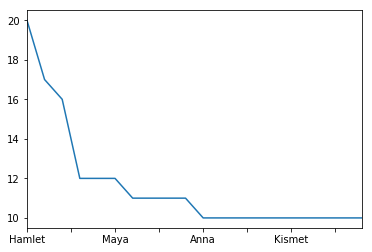

In [113]:
top_movies.head(20).plot()

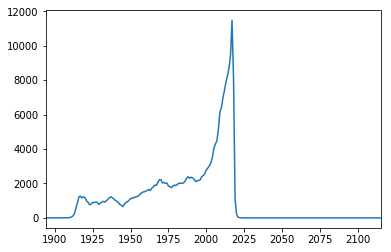

In [114]:
freq.plot()

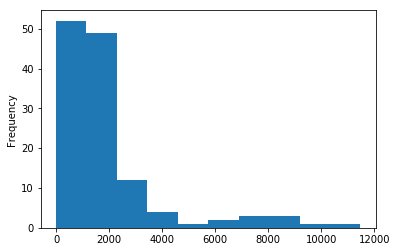

In [115]:
freq.plot.hist()

### Which three years of the 1930s saw the most films released?

In [127]:
movies_of_30s = titles[titles.decades == 1930]  #total = 10k movies


movies_of_30s = movies_of_30s.drop(['title', 'decades'], axis=1)

movies_of_30s.year.value_counts()


1937    1224
1936    1169
1938    1163
1939    1111
1935    1073
1934    1001
1932     964
1933     918
1931     917
1930     848
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

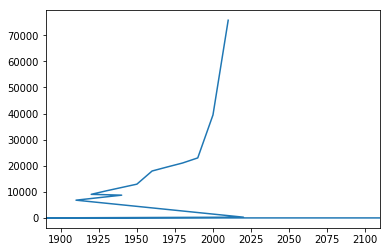

In [201]:
movies_by_decade = titles.sort_index()

freq_movies_by_decades = movies_by_decade.decades.value_counts()


freq_movies_by_decades.plot()

# order problem, !!

### Plot the number of "Hamlet" films made each decade.

In [200]:
hamlet_by_decade = titles[titles['title'].str.startswith('Hamlet')]

freq_hamlet_by_decades = hamlet_by_decade.decades.value_counts()


freq_hamlet_by_decades

2010    15
2000    10
1980     3
1910     3
1960     3
1990     3
1970     2
1950     1
1940     1
1920     1
Name: decades, dtype: int64

### Plot the number of "Rustler" characters in each decade of the history of film.

In [199]:
rustler_by_decade = cast[cast['character'].str.startswith('Rustler')]

freq_rustler_by_decade = rustler_by_decade.decades.value_counts()


freq_rustler_by_decade

1930    94
1940    20
1970     9
1950     8
1920     7
1990     4
2000     2
1960     2
1980     1
Name: decades, dtype: int64

### Plot the number of "Hamlet" characters each decade.

### What are the 11 most common character names in movie history?

### Who are the 10 people most often credited as "Herself" in film history?

### Who are the 10 people most often credited as "Himself" in film history?

### Which actors or actresses appeared in the most movies in the year 1945?

### Which actors or actresses appeared in the most movies in the year 1985?

### Plot how many roles Mammootty has played in each year of his career.

### What are the 10 most frequent roles that start with the phrase "Patron in"?

### What are the 10 most frequent roles that start with the word "Science"?

### Plot the n-values of the roles that Judi Dench has played over her career.

### Plot the n-values of Cary Grant's roles through his career.

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?